In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

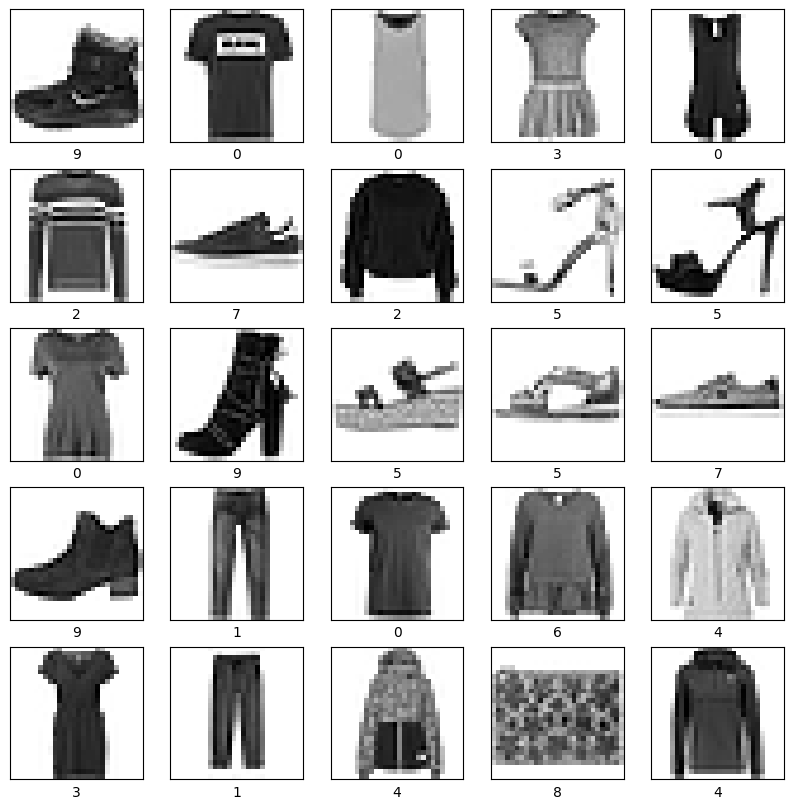

In [ ]:
plt.figure(figsize=(10,10))
for row in range(25):
    plt.subplot(5,5,row+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[row],cmap=plt.cm.binary)
    plt.xlabel(y_train[row])
plt.show()

In [ ]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [ ]:
input_layer= layers.Input(shape=(28,28,1))

In [ ]:
model=keras.models.Sequential([input_layer,
                              layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
                              layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
                              layers.MaxPooling2D(),
                              layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
                              layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
                              layers.MaxPooling2D(),
                              layers.Flatten(),
                              layers.Dense(10,activation='relu'),
                              layers.Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=15,batch_size=32,validation_data=(X_test,y_test),validation_split=0.2)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9060 - loss: 0.2598 - val_accuracy: 0.8947 - val_loss: 0.3008
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9103 - loss: 0.2475 - val_accuracy: 0.8975 - val_loss: 0.2999
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9114 - loss: 0.2482 - val_accuracy: 0.8987 - val_loss: 0.2964
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9102 - loss: 0.2458 - val_accuracy: 0.8990 - val_loss: 0.2898
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9130 - loss: 0.2423 - val_accuracy: 0.9012 - val_loss: 0.2932
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9122 - loss: 0.2390 - val_accuracy: 0.8983 - val_loss: 0.2971
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9123 - loss: 0.2411 - val_accuracy: 0.8999 - val_loss: 0.2898
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9140 - loss: 0.2331 

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f'loss is {loss} and accuracy is {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8938 - loss: 0.3155
loss is 0.30707061290740967 and accuracy is 0.8916000127792358


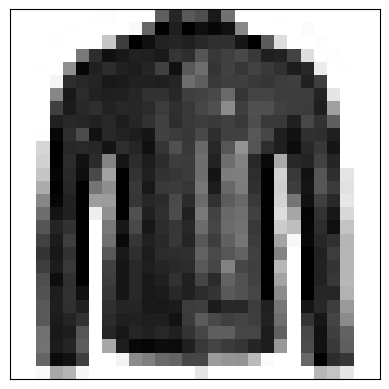

In [ ]:
X_test[50]=X_test[50].reshape(28,28,1)
plt.imshow(X_test[50],cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print(y_test[50])

4


In [ ]:
predications=model.predict(X_test[50].reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [ ]:
print(predications.argmax())

4


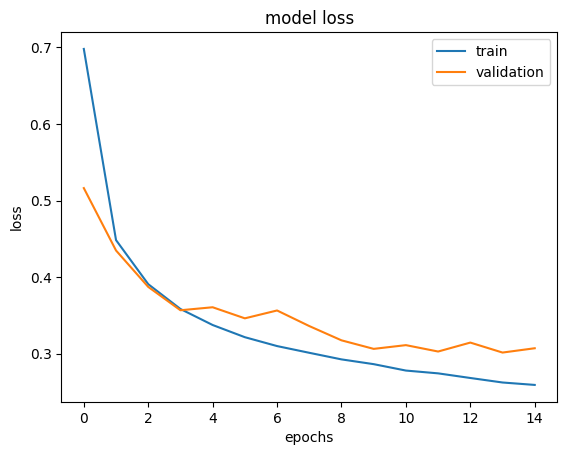

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
df=pd.DataFrame(history.history)
df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.739433,0.698060,0.8117,0.516269
1,0.836400,0.448346,0.8421,0.434762
2,0.859167,0.390770,0.8597,0.387192
3,0.871350,0.358353,0.8750,0.356708
4,0.880233,0.337433,0.8702,0.360615


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/colab_model/fmnist_model.h5')

In [1]:
!git config --global user.email managal.neeraj730@gmail.com
!git config --global user.name mangalneeraj3

In [2]:
!git add "Fashion_Mnist.ipynb"
!git commit -m "Add Fashion_Mnist notebook"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [3]:
!git clone https://github.com/mangalneeraj3/Deep_learnning_moodels.git

Cloning into 'Deep_learnning_moodels'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 2.97 MiB | 13.70 MiB/s, done.


In [4]:
%cd Deep_learnning_moodels
!git status

/content/Deep_learnning_moodels
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'CNN rice classification.ipynb'		 'nlp bASICS.ipynb'    Untitled1.ipynb
'Copy of CNN rice classification.ipynb'   NN2.ipynb	       Untitled2.ipynb
'Copy of Fashion_Mnist.ipynb'		  NN3_graph.ipynb      Untitled3.ipynb
 Fashion_Mnist.ipynb			 'NN(titanic).ipynb'   Untitled4.ipynb
'flower classification.ipynb'		  Untitled	       Untitled5.ipynb
 Mnist.ipynb				  Untitled0.ipynb


In [13]:
!cp "/content/drive/MyDrive/Colab Notebooks/CNN rice classification.ipynb" .